## 빅데이터 활용 AI 설계
# CartPole-v0 with Keras
- https://gist.github.com/tsu-nera/edd306ddeefebe4afb1efceefbc3f953 소스 참고
- dqn_cartpole_keras.py 로 다운받음

### OpenAI gym
- 설치 : pip install gym
- 홈페이지 : http://gym.openai.com/
- 공식블로그 : https://github.com/openai/gym

### gym 기본 사용법

```
import gym

env = gym.make("CartPole-v1")
observation = env.reset()

for _ in range(1000):
  env.render()
  action = env.action_space.sample() # your agent here (this takes random actions)
  observation, reward, done, info = env.step(action)

  if done:
    observation = env.reset()

env.close()
```

### CartPole-v0 게임 정보

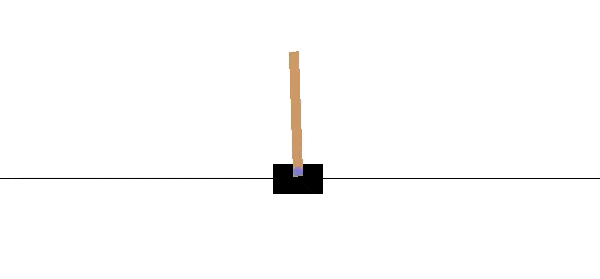

#### 사이트
- https://github.com/openai/gym/wiki/CartPole-v0
- https://gym.openai.com/envs/CartPole-v0/

#### States
- x 좌표 (-2.4 ~ 2.4)
- 이동 속도 (-inf ~ inf)
- 각도 (-41.8도 ~ 41.8도)
- 각속도 (-inf ~ inf)

#### Actions
- 0 : push cart to the left
- 1 : push cart to the right

#### Rewards
- Reward is 1 for every step taken, including the termination step

#### 종료 조건
- 12도를 넘어가는 경우 (실제로는 20도로 적용되는 걸로 보임. 20.01도 등은 종료안함.)
- 중심에서 2.4 만큼 멀어지는 경우 (화면 경계임)

#### 해결 판정
- 100번 실행했을 때, 총보상의 평균값이 195점 이상 나올때

#### v0 과 v1 의 차이
- 최대 시행횟수가 200 과 500 임
- https://stackoverflow.com/questions/56904270/difference-between-openai-gym-environments-cartpole-v0-and-cartpole-v1

### 실행 테스트

In [1]:
import gym

env = gym.make("CartPole-v0")
observation = env.reset()

for i in range(1000):
    env.render()
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    if (i+1)%100 == 0:
        print(i+1, observation, reward, done, info)
        
    if done:
        observation = env.reset()

env.close()

100 [-0.02472801 -0.17071355 -0.01194266  0.07578487] 1.0 False {}
200 [-0.01421324 -0.40699421  0.06788924  0.70478131] 1.0 False {}
300 [ 0.01489082  0.34626522  0.04116833 -0.41059991] 1.0 False {}
400 [-0.55361861 -2.04745845  0.1317383   1.69319071] 1.0 False {}
500 [ 0.04579382  0.83471443 -0.1467374  -1.30675145] 1.0 False {}
600 [ 0.12727478  0.0219257  -0.21573662 -0.44572809] 1.0 True {}
700 [0.02203348 0.16100207 0.0655939  0.10997561] 1.0 False {}
800 [-0.00238942 -0.36771149  0.03402101  0.54982032] 1.0 False {}
900 [ 0.01960767 -0.21095165 -0.00804773  0.256092  ] 1.0 False {}
1000 [ 0.13872671  0.54824038 -0.13238346 -0.93157997] 1.0 False {}


### 초기 설정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [3]:
env = gym.make('CartPole-v0')

### 케라스 모델 생성

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


- 입력 : 상태값 4개 (x좌표, 이동속도, 각도, 각속도)
- 출력 : 행동 2개에 대한 Q값

In [5]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear')) # 0 or 1

model.compile(loss='mse', optimizer=RMSprop(lr=0.001)) # lr=0.001 (default)

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


- Q값 얻어내기

In [7]:
s = np.array([1,0,1,0])

model.predict(s.reshape(1,4))

array([[0.16643557, 0.29958427]], dtype=float32)

- 가중치 확인 (초기 셋팅값)
- 초기값 설정 : https://keras.io/initializers/

In [8]:
ws = model.get_weights()

In [9]:
ws[0]

array([[ 0.386325  , -0.49097928, -0.26991573, -0.14417836,  0.5262145 ,
         0.16781074,  0.0074628 , -0.28612253, -0.28964263,  0.03798467,
        -0.2561935 ,  0.23259026, -0.29525748, -0.3506577 , -0.51867384,
        -0.16937229],
       [ 0.21194649, -0.16402698, -0.29457882, -0.18525264,  0.14743638,
        -0.42693213, -0.22972947,  0.3396274 ,  0.41182542, -0.28060848,
         0.2967075 , -0.34620845, -0.19947487, -0.4014002 , -0.38973475,
         0.36908472],
       [ 0.44060946, -0.40960073,  0.2913105 ,  0.46852148,  0.09516752,
        -0.35026684, -0.20644236,  0.22861475,  0.03071374,  0.41715062,
         0.32557958, -0.13822305,  0.08763486, -0.44521147,  0.3655637 ,
        -0.36807096],
       [ 0.34233236, -0.32733232,  0.23517716, -0.35342824,  0.15881968,
        -0.5359714 ,  0.50247943,  0.4109395 ,  0.1642375 ,  0.24854213,
         0.4811517 , -0.49664846, -0.15443024, -0.36678234, -0.2678518 ,
         0.42252547]], dtype=float32)

In [10]:
ws[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 버퍼 지정
- 시뮬레이션 이력을 저장해 놓는다
- 총 10000개의 이력 저장
- collections.deque 는 버퍼가 꽉 차면 오래된 데이터 부터 버린다

In [11]:
import collections

memory = collections.deque(maxlen = 10000)

### 사전 학습
- 한 번에 학습할 배치 크기를 32 로 할 예정이므로, 미리 32개의 이력을 만들어 놓는다
- 랜덤 행동을 하여 memory 에 저장한다

In [12]:
s = env.reset()

In [13]:
for i in range(32):
    action = env.action_space.sample() # np.random.randint(2)
    s2, r, done, _ = env.step(action)
    
    memory.append([s, action, r, done, s2])
    
    s = env.reset() if done else s2 # done 이면 리셋

In [14]:
len(memory)

32

In [15]:
display(memory[0], memory[-1])

[array([-0.00394049, -0.04439316, -0.04912837,  0.02777038]),
 0,
 1.0,
 False,
 array([-0.00482835, -0.2387774 , -0.04857296,  0.30455701])]

[array([-0.0530723 , -0.38406051, -0.01610989,  0.52525225]),
 1,
 1.0,
 False,
 array([-0.06075351, -0.1887156 , -0.00560484,  0.22753681])]

### Q-learning & SARSA

- Temporal difference learning
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/9c2c752364a919d563253cdab2ab846e59d5cb8d' /><br>

- Q-learning
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/47fa1e5cf8cf75996a777c11c7b9445dc96d4637' /><br>

- SARSA (State–action–reward–state–action)
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/4ea76ebe74645baff9d5a67c83eac1daff812d79' /><br>

(출처 : wikipedia)

### Exploitation vs Exploration (관례 대 탐험)
- Exploitation : 기존 경험에 비추어 결과가 가장 좋았던 행동을 수행하는 행동 결정 방식
- Exploration : 가장 좋았던 행동이 아니라 새로운 행동을 수행하는 방식 (흔하게는 랜덤 행동 수행)
- 일반적으로, 처음에는 탐험을 하다가 경험이 쌓일 수록 점점 관례를 많이 따르도록 한다.
- epsilon($\epsilon$) : 탐험을 수행할 확률을 지정

### 학습 실행

In [16]:
epsilon = 1.0 # 처음에는 탐험만 수행한다. (랜덤 행동)
gamma = 0.99 # 감쇠율 (discount factor, 미래 보상을 얼마나 중요시할 지를 결정)
returns = [] # 에피소드 당 총보상값을 저장한다
count = 0

In [17]:
### 총 10000번의 에피소드를 진행한다.
for episode in range(300):
    
    total_reward = 0 # 에피소스당 총보상값
    
    s = env.reset()
    
    for i in range(200): # 한 에피소드당 최대 200번만 행동한다
        
        ### 탐험 확률 지정 (1 부터 시작해서 점점 낮아지다 최소값은 1%)
        epsilon = 0.01 + (1-0.01)*np.exp(-0.0001*count)
        count += 1
        
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # 랜덤 행동
        else:
            action = np.argmax(model.predict(s.reshape(1,4))[0]) # Q값이 높은 행동 선택
            
        s2, r, done, _ = env.step(action)
        
        total_reward += r
        
        memory.append([s, action, r, done, s2])
        
        ### 학습 (배치크기는 32)
        indices = np.random.choice(len(memory), 32, replace=False)
        samples = [memory[i] for i in indices]
        
        X = np.zeros([32,4]) # 입력 상태값
        y = np.zeros([32,2]) # 목표 Q값
        
        for i, sample in enumerate(samples): # sample -> [s,a,r,done,s2]
            X[i] = sample[0]
            y[i] = model.predict(sample[0].reshape(1,4))[0]
            
            if sample[3] == True: # done
                y[i][sample[1]] = sample[2]
            else:
                y[i][sample[1]] = sample[2] + gamma*np.max(model.predict(sample[-1].reshape(1,4))[0])
                
        model.fit(X, y, epochs=1, verbose=False)
        
        if done:
            break
        else:
            s = s2
            
    print('Episode: %d, Reward: %d, Epsilon: %.5f' % (episode+1, total_reward, epsilon))
    returns.append(total_reward)

Episode: 1, Reward: 18, Epsilon: 0.99832
Episode: 2, Reward: 38, Epsilon: 0.99457
Episode: 3, Reward: 16, Epsilon: 0.99300
Episode: 4, Reward: 42, Epsilon: 0.98888
Episode: 5, Reward: 74, Epsilon: 0.98166
Episode: 6, Reward: 11, Epsilon: 0.98059
Episode: 7, Reward: 23, Epsilon: 0.97836
Episode: 8, Reward: 28, Epsilon: 0.97565
Episode: 9, Reward: 15, Epsilon: 0.97421
Episode: 10, Reward: 10, Epsilon: 0.97324
Episode: 11, Reward: 21, Epsilon: 0.97122
Episode: 12, Reward: 15, Epsilon: 0.96978
Episode: 13, Reward: 10, Epsilon: 0.96882
Episode: 14, Reward: 23, Epsilon: 0.96662
Episode: 15, Reward: 10, Epsilon: 0.96566
Episode: 16, Reward: 13, Epsilon: 0.96442
Episode: 17, Reward: 17, Epsilon: 0.96280
Episode: 18, Reward: 23, Epsilon: 0.96061
Episode: 19, Reward: 17, Epsilon: 0.95900
Episode: 20, Reward: 22, Epsilon: 0.95691
Episode: 21, Reward: 26, Epsilon: 0.95445
Episode: 22, Reward: 14, Epsilon: 0.95313
Episode: 23, Reward: 10, Epsilon: 0.95219
Episode: 24, Reward: 27, Epsilon: 0.94965
E

Episode: 194, Reward: 127, Epsilon: 0.51356
Episode: 195, Reward: 54, Epsilon: 0.51085
Episode: 196, Reward: 175, Epsilon: 0.50216
Episode: 197, Reward: 56, Epsilon: 0.49941
Episode: 198, Reward: 200, Epsilon: 0.48972
Episode: 199, Reward: 65, Epsilon: 0.48661
Episode: 200, Reward: 95, Epsilon: 0.48211
Episode: 201, Reward: 84, Epsilon: 0.47816
Episode: 202, Reward: 100, Epsilon: 0.47350
Episode: 203, Reward: 200, Epsilon: 0.46432
Episode: 204, Reward: 140, Epsilon: 0.45801
Episode: 205, Reward: 35, Epsilon: 0.45644
Episode: 206, Reward: 131, Epsilon: 0.45063
Episode: 207, Reward: 100, Epsilon: 0.44625
Episode: 208, Reward: 45, Epsilon: 0.44429
Episode: 209, Reward: 106, Epsilon: 0.43971
Episode: 210, Reward: 112, Epsilon: 0.43492
Episode: 211, Reward: 94, Epsilon: 0.43095
Episode: 212, Reward: 90, Epsilon: 0.42717
Episode: 213, Reward: 174, Epsilon: 0.41998
Episode: 214, Reward: 69, Epsilon: 0.41716
Episode: 215, Reward: 126, Epsilon: 0.41206
Episode: 216, Reward: 199, Epsilon: 0.4041

In [18]:
len(returns), len(memory)

(300, 10000)

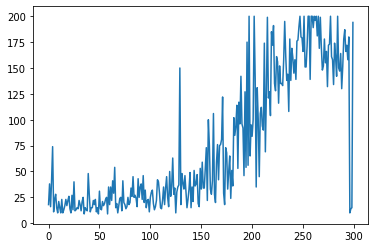

In [19]:
plt.plot(returns)

### 게임 테스트

In [22]:
for epoch in range(3):
    env.reset()
    
    done = False
    n = 0
    while not done:
        #a = np.random.randint(2)
        a = np.argmax(model.predict(s.reshape(1,4))[0])
        s, r, done, info = env.step(a)
        n += 1
        env.render()
        #print(s, r, done, info)
        
    print('Epoch: %d, Count: %d' % (epoch+1, n))
    print(s, r, done, info)
    #input()

Epoch: 1, Count: 12
[ 0.12064586  0.82404479 -0.21331093 -1.42999035] 1.0 True {}
Epoch: 2, Count: 10
[ 0.13608644  1.20797478 -0.21991899 -2.06079556] 1.0 True {}
Epoch: 3, Count: 33
[ 0.1920564   0.97289791 -0.22978971 -1.89255773] 1.0 True {}


In [23]:
env.close()